#  Hill Climbing con Random Restart per funzioni continue
Caso di una funzione continua a due variabili

In [1]:
from numpy import asarray
from numpy import arange 
from numpy import exp 
from numpy import sqrt 
from numpy import cos 
from numpy import e
from numpy import pi

from numpy.random import randn 
from numpy.random import rand 
from numpy.random import seed

from numpy import meshgrid
from matplotlib import pyplot

import numpy as np

## Definizione della Funzione Obiettivo


Utilizziamo come funzione obiettivo la funzione di Ackley, molto usata come test function per problemi di ottimizzazione. Nel caso di due variabili la funzione assume la forma seguente:

$$\text{ackley}(x,y) = -a \cdot \exp \left({-b \cdot \sqrt{\frac{1}{2} (x^2 + y^2)}} \right) - \exp\left({\frac{1}{2}  (\cos(c x) + \cos(c y))}\right) + \exp(1) + a$$

Tale funzione ha un minimo globale all'origine dove assume un valore uguale a zero.

Valori tipici per i parametri che compaiono nella funzione sono: $a = 20$, $b = 0.2$ e $c = 2\pi$.

In [2]:
def ackley(v):
    x, y = v
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2*pi*y))) + e + 20

## Visualizzazione della Funzione Obiettivo

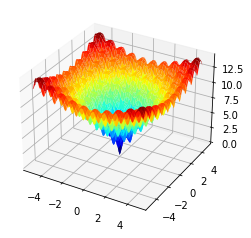

In [3]:
# definizione intervallo per l'input
r_min, r_max = -5.0, 5.0
# campionamento uniforme intervallo input con incrementi di 0.1
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# creazione mesh da axis
x, y = meshgrid(xaxis, yaxis)
# calcolo valori funzione obiettivo
v = x, y
results = ackley(v)
# creazione surface plot
fig, ax = pyplot.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, results, cmap='jet');
#pyplot.show()

## Controllo superamento limiti insieme di definizione

In [4]:
def in_bounds(point, bounds):
    # per ciascuna dimensione del punto ... 
    for d in range(len(bounds)):
        # ... verifica se esce dai limiti di tale dimensione
        if point[d] < bounds[d, 0] or point[d] > bounds[d, 1]: 
            return False
    return True

## Algoritmo

In [5]:
# algoritmo hill climbing base
def hill_climbing(objective, bounds, n_iterations, step_size, start_pt):
    
    # impostazione dello stato iniziale
    current = start_pt
    current_eval = objective(current)
    
    # run the hill climb
    for i in range(n_iterations):
        next_state = None
        while next_state is None or not in_bounds(next_state, bounds):
            next_state = current + randn(len(bounds)) * step_size
        # valutazione di next
        next_state_eval = objective(next_state)
        # verifica se next è migliore di current
        if next_state_eval <= current_eval:
            # next diventa il nuovo current
            current, current_eval = next_state, next_state_eval
    return [current, current_eval]



# algoritmo hill climbing con random restarts 
def random_restarts(objective, bounds, n_iter, step_size, n_restarts):
    
    # inizializzazione di best
    best, best_eval = None, np.inf
    
    # per ogni riavvio ...
    for n in range(n_restarts):
        
        # generazione random di un punto iniziale per la ricerca
        start_pt = None
        while start_pt is None or not in_bounds(start_pt, bounds):
            start_pt = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
            
        # richiamo dell'algoritmo di hill climbing base
        current, current_eval = hill_climbing(objective, bounds, n_iter, step_size, start_pt)
        
        # verifica se lo stato corrente è il migliore
        if current_eval < best_eval:
            best, best_eval = current, current_eval
            print('Restart %d, best: f(%s) = %.5f' % (n, best, best_eval))
    return [best, best_eval]

## Impostazione Parametri

In [6]:
# seed per il generatore di numeri pseudocasuali
seed(1)
# definizione del range per l'input
bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])
# definizione del numero totale di iterazioni
n_iterations = 1000
# definizione dello step size
step_size = 0.05
# numero totale delle ripartenze casuali
n_restarts = 30

## Esecuzione dell'algoritmo

In [7]:
best, score = random_restarts(ackley, bounds, n_iterations, step_size, n_restarts) 

print('Done!')
print('f(%s) = %f' % (best, score))

Restart 0, best: f([-0.98102417  1.96555308]) = 5.38194
Restart 2, best: f([1.96522236 0.98120013]) = 5.38191
Restart 4, best: f([0.00223194 0.00258853]) = 0.00998
Done!
f([0.00223194 0.00258853]) = 0.009978
